In [1]:
import numpy as np
import pandas as pd
import tensorflow

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

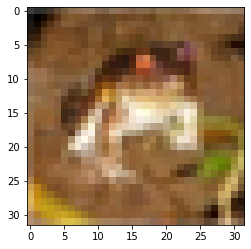

In [6]:
plt.imshow(x_train[0])  #frog

[7]


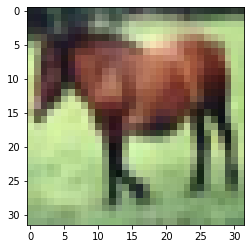

In [7]:
plt.imshow(x_train[7])
print(y_train[7])#horse

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
#airplane :0
#automobile:1
#bird:2
#cat:3
#deer:4
#dog:5
#frog:6
#horse:7
#ship:8
#truck:9
    

## PreProcessing

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
x_train.max()

255

In [13]:
x_train.min()

0

In [14]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
x_train=x_train/255
x_test=x_test/255

## Labels

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train=to_categorical(y_train,10)

In [18]:
y_cat_test=to_categorical(y_test,10)

## building the model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model = Sequential()

# FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(256, activation='relu'))

# 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5399 - accuracy: 0.4468 - val_loss: 1.2886 - val_accuracy: 0.5398
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1904 - accuracy: 0.5810 - val_loss: 1.2040 - val_accuracy: 0.5819
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0439 - accuracy: 0.6379 - val_loss: 1.1030 - val_accuracy: 0.6191
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9314 - accuracy: 0.6784 - val_loss: 0.9881 - val_accuracy: 0.6610
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8495 - accuracy: 0.7100 - val_loss: 1.0420 - val_accuracy: 0.6593
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7777 - accuracy: 0.7328 - val_loss: 1.2529 - val_accuracy: 0.5995
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7286 - accuracy: 0.7524 - val_loss: 1.0110 - val_ac

In [23]:
losses=pd.DataFrame(model.history.history)

In [24]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.539926,0.44680,1.288594,0.5398
1,1.190435,0.58098,1.203967,0.5819
2,1.043857,0.63794,1.103029,0.6191
3,0.931448,0.67840,0.988120,0.6610
4,0.849504,0.71002,1.041962,0.6593


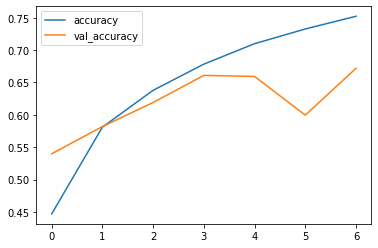

In [25]:
losses[['accuracy','val_accuracy']].plot()

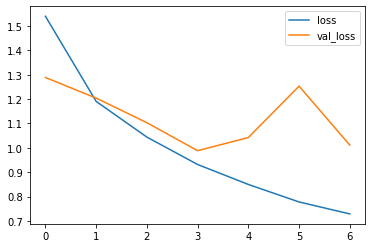

In [26]:
losses[['loss','val_loss']].plot()

In [27]:
test_result=model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0110 - accuracy: 0.6720


In [28]:
pd.DataFrame(test_result,index=model.metrics_names,columns=['Test Data Metrics'])

,Test Data Metrics
loss,1.010971
accuracy,0.672000


In [29]:
predictions=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
pd.DataFrame(y_test,predictions,columns=['Preditions']).head()

,Preditions
5,3
8,8
8,8
0,0
4,6


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.89      0.69      0.77      1000
           2       0.55      0.60      0.57      1000
           3       0.54      0.33      0.41      1000
           4       0.62      0.63      0.63      1000
           5       0.50      0.70      0.58      1000
           6       0.69      0.83      0.75      1000
           7       0.78      0.68      0.73      1000
           8       0.80      0.77      0.78      1000
           9       0.71      0.80      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



[[705  11  64  24  35  19  11  15  76  40]
 [ 18 688  25  12   9  19  25   6  39 159]
 [ 43   3 601  30  91 105  85  20  11  11]
 [ 12   3 105 326  71 324  90  31  10  28]
 [ 14   1  83  47 632  76  91  42  13   1]
 [  7   1  81  79  37 697  40  43   4  11]
 [  7   0  37  35  30  42 826   7   4  12]
 [ 15   1  49  25  92  93  18 679   3  25]
 [ 76  24  27  15  18  13   6   6 770  45]
 [ 31  44  22  13   6  19  10  22  37 796]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


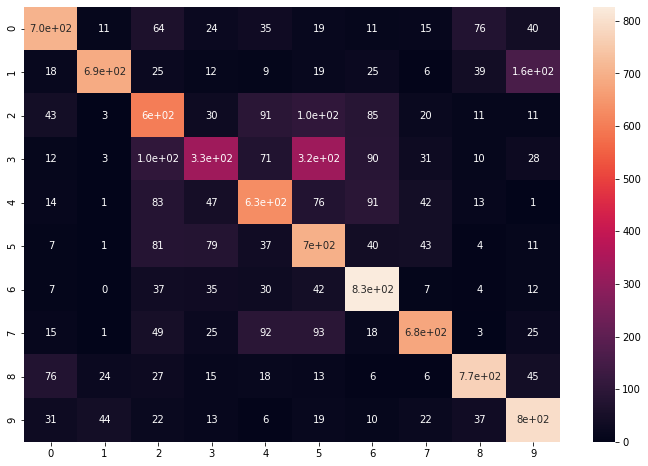

In [33]:
print(confusion_matrix(y_test,predictions))
plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [34]:
#Looks like the model accuracy in training as well as test set is lower; so deeper NN and hyper parameter tuning is required


In [35]:
def build_model():
    model=tensorflow.keras.Sequential()
    
    #1st layer
    model.add(tensorflow.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3,input_shape=(32,32,3)))
    model.add(tensorflow.keras.layers.BatchNormalization())
    model.add(tensorflow.keras.layers.Activation('relu'))
    model.add(tensorflow.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3))
    model.add(tensorflow.keras.layers.BatchNormalization())
    model.add(tensorflow.keras.layers.Activation('relu'))
    model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tensorflow.keras.layers.Dropout(0.2))

    #2nd layer
    model.add(tensorflow.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3))
    model.add(tensorflow.keras.layers.BatchNormalization())
    model.add(tensorflow.keras.layers.Activation('relu'))
    model.add(tensorflow.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3))
    model.add(tensorflow.keras.layers.BatchNormalization())
    model.add(tensorflow.keras.layers.Activation('relu'))
    model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tensorflow.keras.layers.Dropout(0.2))

    #3rd layer
    model.add(tensorflow.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3))
    model.add(tensorflow.keras.layers.BatchNormalization())
    model.add(tensorflow.keras.layers.Activation('relu'))
    model.add(tensorflow.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3))
    model.add(tensorflow.keras.layers.BatchNormalization())
    model.add(tensorflow.keras.layers.Activation('relu'))
    model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tensorflow.keras.layers.Dropout(0.2))
 
    #4th layer
    model.add(tensorflow.keras.layers.Flatten()) #to make 4x4x128 layer to 2048 flat layer  
    model.add(tensorflow.keras.layers.Dense(10,activation='softmax'))#output has  10 classes
  
    return model

In [36]:
model=build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

## Training with Adam Optimizer

In [37]:
model=build_model()
optimizer=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-5, amsgrad=False)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [38]:
history_adam=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
157/157 [==============================] - 10s 65ms/step - loss: 1.6789 - accuracy: 0.4265 - val_loss: 3.4744 - val_accuracy: 0.1066 - lr: 0.0010
Epoch 2/75
157/157 [==============================] - 10s 62ms/step - loss: 1.1574 - accuracy: 0.5898 - val_loss: 2.3121 - val_accuracy: 0.2842 - lr: 0.0010
Epoch 3/75
157/157 [==============================] - 10s 61ms/step - loss: 0.9449 - accuracy: 0.6672 - val_loss: 1.5472 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 4/75
157/157 [==============================] - 10s 62ms/step - loss: 0.8164 - accuracy: 0.7135 - val_loss: 1.0540 - val_accuracy: 0.6496 - lr: 0.0010
Epoch 5/75
157/157 [==============================] - 10s 62ms/step - loss: 0.7359 - accuracy: 0.7401 - val_loss: 0.9119 - val_accuracy: 0.7010 - lr: 0.0010
Epoch 6/75
157/157 [==============================] - 10s 62ms/step - loss: 0.6686 - accuracy: 0.7667 - val_loss: 0.7591 - val_accuracy: 0.7342 - lr: 0.0010
Epoch 7/75
157/157 [==============================] - 10s 

In [39]:
print("accuracy on test set with Adam Optimizer is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with Adam Optimizer is 83.63999724388123 %


## RMS Prop

In [40]:
model=build_model()
optimizer=tensorflow.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [41]:
history_RMSprop=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
157/157 [==============================] - 11s 68ms/step - loss: 1.8084 - accuracy: 0.3944 - val_loss: 3.6654 - val_accuracy: 0.0952 - lr: 0.0010
Epoch 2/75
157/157 [==============================] - 10s 66ms/step - loss: 1.2534 - accuracy: 0.5576 - val_loss: 2.6367 - val_accuracy: 0.2275 - lr: 0.0010
Epoch 3/75
157/157 [==============================] - 10s 66ms/step - loss: 1.0311 - accuracy: 0.6375 - val_loss: 1.6178 - val_accuracy: 0.4623 - lr: 0.0010
Epoch 4/75
157/157 [==============================] - 10s 67ms/step - loss: 0.8830 - accuracy: 0.6874 - val_loss: 1.6145 - val_accuracy: 0.4757 - lr: 0.0010
Epoch 5/75
157/157 [==============================] - 10s 66ms/step - loss: 0.7851 - accuracy: 0.7206 - val_loss: 0.9438 - val_accuracy: 0.6766 - lr: 0.0010
Epoch 6/75
157/157 [==============================] - 10s 66ms/step - loss: 0.7096 - accuracy: 0.7489 - val_loss: 1.3889 - val_accuracy: 0.5969 - lr: 0.0010
Epoch 7/75
157/157 [==============================] - 10s 

In [42]:
print("accuracy on test set is {} % with RMS Prop optimizer".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set is 84.2199981212616 % with RMS Prop optimizer


## SGD with Momentum

In [43]:
model=build_model()
optimizer=tensorflow.keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [44]:
history_SGDmomentum=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
157/157 [==============================] - 10s 64ms/step - loss: 2.0000 - accuracy: 0.3642 - val_loss: 3.3989 - val_accuracy: 0.1043 - lr: 0.0100
Epoch 2/75
157/157 [==============================] - 10s 63ms/step - loss: 1.3594 - accuracy: 0.5144 - val_loss: 2.6021 - val_accuracy: 0.2044 - lr: 0.0100
Epoch 3/75
157/157 [==============================] - 10s 62ms/step - loss: 1.1609 - accuracy: 0.5868 - val_loss: 1.3848 - val_accuracy: 0.4997 - lr: 0.0100
Epoch 4/75
157/157 [==============================] - 10s 62ms/step - loss: 1.0309 - accuracy: 0.6357 - val_loss: 1.2130 - val_accuracy: 0.5625 - lr: 0.0100
Epoch 5/75
157/157 [==============================] - 10s 62ms/step - loss: 0.9336 - accuracy: 0.6678 - val_loss: 1.0397 - val_accuracy: 0.6356 - lr: 0.0100
Epoch 6/75
157/157 [==============================] - 10s 62ms/step - loss: 0.8555 - accuracy: 0.6955 - val_loss: 0.9556 - val_accuracy: 0.6639 - lr: 0.0100
Epoch 7/75
157/157 [==============================] - 10s 

In [45]:
print("accuracy on test set is  with SGD momentum optimizer {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set is  with SGD momentum optimizer 82.60999917984009 %


## ADA Grad

In [46]:
model=build_model()
optimizer=tensorflow.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [47]:
history_ADAgrad=model.fit(x_train,y_cat_train,epochs=75,batch_size=256,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
157/157 [==============================] - 10s 63ms/step - loss: 2.0856 - accuracy: 0.3386 - val_loss: 2.8235 - val_accuracy: 0.1312 - lr: 0.0100
Epoch 2/75
157/157 [==============================] - 10s 62ms/step - loss: 1.5065 - accuracy: 0.4609 - val_loss: 2.6356 - val_accuracy: 0.1610 - lr: 0.0100
Epoch 3/75
157/157 [==============================] - 10s 62ms/step - loss: 1.3638 - accuracy: 0.5150 - val_loss: 1.6419 - val_accuracy: 0.4138 - lr: 0.0100
Epoch 4/75
157/157 [==============================] - 10s 63ms/step - loss: 1.2552 - accuracy: 0.5520 - val_loss: 1.2711 - val_accuracy: 0.5427 - lr: 0.0100
Epoch 5/75
157/157 [==============================] - 10s 62ms/step - loss: 1.1699 - accuracy: 0.5811 - val_loss: 1.2729 - val_accuracy: 0.5427 - lr: 0.0100
Epoch 6/75
157/157 [==============================] - 10s 63ms/step - loss: 1.0997 - accuracy: 0.6111 - val_loss: 1.5020 - val_accuracy: 0.4928 - lr: 0.0100
Epoch 7/75
157/157 [==============================] - 10s 

In [48]:
print("accuracy on test set with ADA Grad optimizer is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with ADA Grad optimizer is 75.94000101089478 %


## Visualizing performance of various optimizer 

Text(0.5, 1.0, 'Validation Loss of different optimizers v/s Epochs')

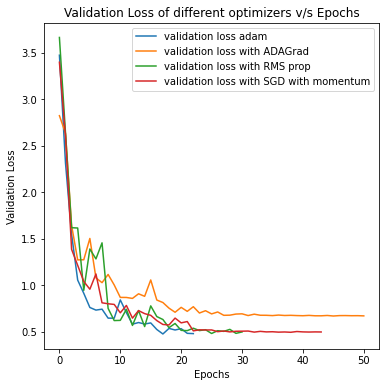

In [49]:
plt.figure(figsize=(6,6))
plt.plot(history_adam["val_loss"],label="validation loss adam")
plt.plot(history_ADAgrad["val_loss"],label="validation loss with ADAGrad")
plt.plot(history_RMSprop["val_loss"],label="validation loss with RMS prop")
plt.plot(history_SGDmomentum["val_loss"],label="validation loss with SGD with momentum")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss of different optimizers v/s Epochs")

## FINE TUNING WITH ADAM OPTIMIZER

In [50]:
model=build_model()
optimizer=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-5, amsgrad=False)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=1)
red_lr = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [51]:
history_adam_1=model.fit(x_train,y_cat_train,epochs=75,batch_size=128,validation_split=0.2,callbacks=[early_stopping,red_lr]).history

Epoch 1/75
313/313 [==============================] - 12s 37ms/step - loss: 1.5624 - accuracy: 0.4560 - val_loss: 2.4896 - val_accuracy: 0.2207 - lr: 0.0010
Epoch 2/75
313/313 [==============================] - 11s 37ms/step - loss: 1.0725 - accuracy: 0.6223 - val_loss: 1.4034 - val_accuracy: 0.5280 - lr: 0.0010
Epoch 3/75
313/313 [==============================] - 11s 37ms/step - loss: 0.8660 - accuracy: 0.6966 - val_loss: 1.4510 - val_accuracy: 0.5874 - lr: 0.0010
Epoch 4/75
313/313 [==============================] - 11s 37ms/step - loss: 0.7532 - accuracy: 0.7341 - val_loss: 0.7939 - val_accuracy: 0.7256 - lr: 0.0010
Epoch 5/75
313/313 [==============================] - 11s 37ms/step - loss: 0.6784 - accuracy: 0.7630 - val_loss: 0.8151 - val_accuracy: 0.7287 - lr: 0.0010
Epoch 6/75
313/313 [==============================] - 12s 37ms/step - loss: 0.6118 - accuracy: 0.7831 - val_loss: 0.6792 - val_accuracy: 0.7591 - lr: 0.0010
Epoch 7/75
313/313 [==============================] - 11s 

In [52]:
print("accuracy on test set with Adam Optimizer after tuning is {} %".format(model.evaluate(x_test, y_cat_test, verbose=0)[1]*100))

accuracy on test set with Adam Optimizer after tuning is 84.74000096321106 %


Text(0.5, 1.0, 'Loss v/s Epochs')

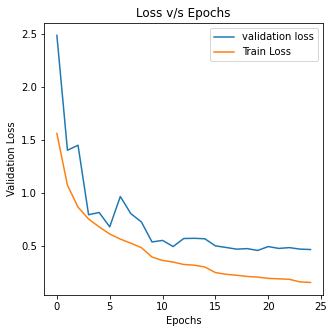

In [53]:
plt.figure(figsize=(5,5))
plt.plot(history_adam_1["val_loss"],label="validation loss")
plt.plot(history_adam_1["loss"],label="Train Loss")

plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Loss v/s Epochs")

Text(0.5, 1.0, 'Loss v/s Epochs')

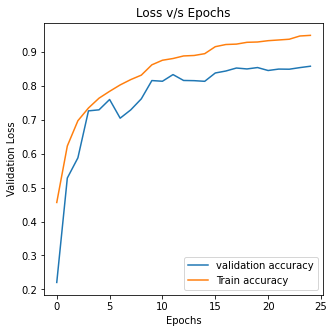

In [54]:
plt.figure(figsize=(5,5))
plt.plot(history_adam_1["val_accuracy"],label="validation accuracy")
plt.plot(history_adam_1["accuracy"],label="Train accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Loss v/s Epochs")

[[877  15  34   5   3   1   2   4  36  23]
 [  8 932   2   2   1   2   1   0  10  42]
 [ 37   1 791  31  55  37  28   7   7   6]
 [ 11   2  56 692  43 116  40  15  10  15]
 [ 11   1  44  28 852  13  16  24   8   3]
 [  8   2  30 102  36 776  14  26   2   4]
 [  5   5  41  34  24  11 869   4   4   3]
 [ 12   0  25  17  38  41   4 855   1   7]
 [ 31  13   8   0   1   2   0   3 931  11]
 [ 22  49   2   2   0   1   1   4  20 899]]


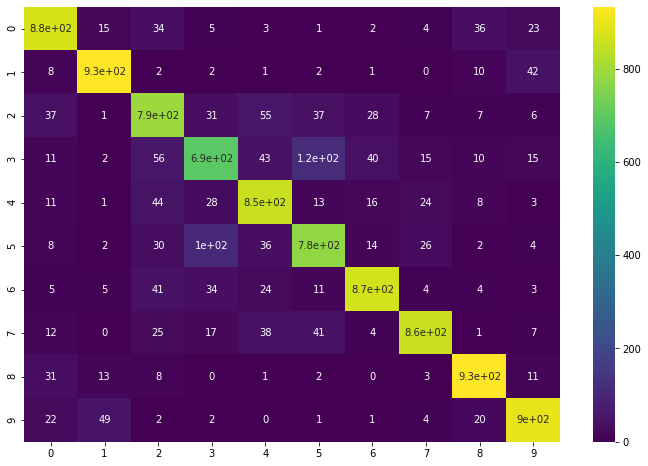

In [55]:
predictions=model.predict_classes(x_test)
print(confusion_matrix(y_test,predictions))
plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')

# DATA AUGMENTATION

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

In [57]:
datagen = ImageDataGenerator(rotation_range=25,horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2)
datagen.fit(x_train)

In [58]:
model2 = build_model()#model as like before
optimizer=tensorflow.keras.optimizers.Adam(lr=0.0010, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [59]:
history=model.fit_generator(datagen.flow(x_train,y_cat_train, batch_size=128),
                              epochs = 75, validation_data = (x_test,y_cat_test), steps_per_epoch=x_train.shape[0]//128)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
390/390 [==============================] - 36s 91ms/step - loss: 0.9372 - accuracy: 0.6833 - val_loss: 0.7066 - val_accuracy: 0.7700
Epoch 2/75
390/390 [==============================] - 37s 95ms/step - loss: 0.8241 - accuracy: 0.7129 - val_loss: 0.6676 - val_accuracy: 0.7797
Epoch 3/75
390/390 [==============================] - 37s 95ms/step - loss: 0.7812 - accuracy: 0.7274 - val_loss: 0.8128 - val_accuracy: 0.7327
Epoch 4/75
390/390 [==============================] - 37s 95ms/step - loss: 0.7566 - accuracy: 0.7362 - val_loss: 0.7514 - val_accuracy: 0.7582
Epoch 5/75
390/390 [==============================] - 37s 96ms/step - loss: 0.7350 - accuracy: 0.7446 - val_loss: 0.7351 - val_accuracy: 0.7652
Epoch 6/75
390/390 [==============================] - 38s 97ms/step - loss: 0.7098 - accuracy: 0.7547 - val_loss: 0.8024 - val_accuracy: 0.7424
Epoch 7/75
390/390 [==============================] - 38s 97

In [60]:
print("accuracy on test set after Data augmentation is {} %".format(model.evaluate(x_test, y_cat_test,batch_size=128,verbose=0)[1]*100))

accuracy on test set after Data augmentation is 85.14000177383423 %


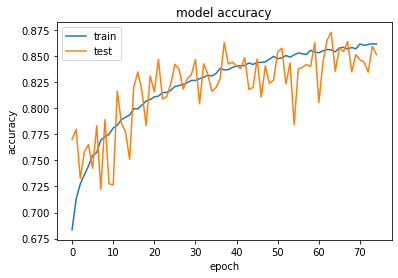

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
model2 = Sequential()
reg2=None
#1st set of layer
model2.add(tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=reg2,input_shape=(32,32,3),padding='same'))
model2.add(tensorflow.keras.layers.BatchNormalization(axis=-1))
model2.add(tensorflow.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=reg2,padding='same'))
model2.add(tensorflow.keras.layers.BatchNormalization(axis=-1))
model2.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model2.add(tensorflow.keras.layers.Dropout(0))

#2nd set of layer
model2.add(tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=reg2,input_shape=(32,32,3),padding='same'))
model2.add(tensorflow.keras.layers.BatchNormalization(axis=-1))
model2.add(tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=reg2,padding='same'))
model2.add(tensorflow.keras.layers.BatchNormalization(axis=-1))
model2.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model2.add(tensorflow.keras.layers.Dropout(0))

#3rd set of layer
model2.add(tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=reg2,input_shape=(32,32,3),padding='same'))
model2.add(tensorflow.keras.layers.BatchNormalization(axis=-1))
model2.add(tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=reg2,padding='same'))
model2.add(tensorflow.keras.layers.BatchNormalization(axis=-1))
model2.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))  
model2.add(tensorflow.keras.layers.Dropout(0))

#flatten and output layer
model2.add(Flatten())
model2.add(tensorflow.keras.layers.Dense(512, activation='relu',kernel_regularizer=reg2))
model2.add(tensorflow.keras.layers.BatchNormalization())
model2.add(tensorflow.keras.layers.Dropout(.5))
model2.add(tensorflow.keras.layers.Dense(10, activation='softmax'))
#adam optimizer
optimizer=tensorflow.keras.optimizers.Adam(lr=0.0010, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0)
#model compile
model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [63]:
history2=model2.fit_generator(datagen.flow(x_train,y_cat_train, batch_size=128),
                              epochs = 100, validation_data = (x_test,y_cat_test), steps_per_epoch=x_train.shape[0]//128)

Epoch 1/100
390/390 [==============================] - 40s 101ms/step - loss: 1.8188 - accuracy: 0.4028 - val_loss: 2.5488 - val_accuracy: 0.2438
Epoch 2/100
390/390 [==============================] - 39s 99ms/step - loss: 1.3327 - accuracy: 0.5349 - val_loss: 1.0238 - val_accuracy: 0.6348
Epoch 3/100
390/390 [==============================] - 39s 100ms/step - loss: 1.1000 - accuracy: 0.6105 - val_loss: 1.1287 - val_accuracy: 0.6329
Epoch 4/100
390/390 [==============================] - 39s 99ms/step - loss: 0.9727 - accuracy: 0.6566 - val_loss: 0.9500 - val_accuracy: 0.6834
Epoch 5/100
390/390 [==============================] - 39s 100ms/step - loss: 0.8814 - accuracy: 0.6905 - val_loss: 1.1262 - val_accuracy: 0.6557
Epoch 6/100
390/390 [==============================] - 39s 100ms/step - loss: 0.8152 - accuracy: 0.7176 - val_loss: 0.7119 - val_accuracy: 0.7619
Epoch 7/100
390/390 [==============================] - 39s 100ms/step - loss: 0.7698 - accuracy: 0.7334 - val_loss: 0.8045 - v

In [64]:
print("accuracy on test set after Data augmentation with modified model is {} %".format(model2.evaluate(x_test, y_cat_test,batch_size=128,verbose=0)[1]*100))

accuracy on test set after Data augmentation with modified model is 88.48000168800354 %


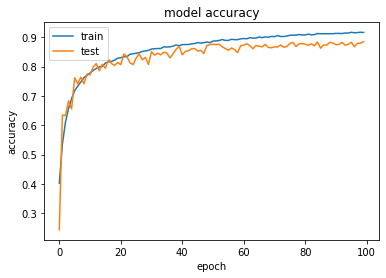

In [65]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[910  15  15   2   5   1   4   7  21  20]
 [  4 950   0   0   0   0   1   1   1  43]
 [ 30   4 840  19  33  11  36  18   4   5]
 [ 10  11  18 761  42  64  41  27   8  18]
 [  2   1  19  17 904   3  28  23   0   3]
 [  2   1  30 111  37 751  20  40   1   7]
 [  5   2  16  17  10   1 940   4   2   3]
 [  8   1   9  11  22   7   6 929   1   6]
 [ 36  13   2   4   0   1   4   3 918  19]
 [ 15  33   1   0   0   0   1   0   5 945]]


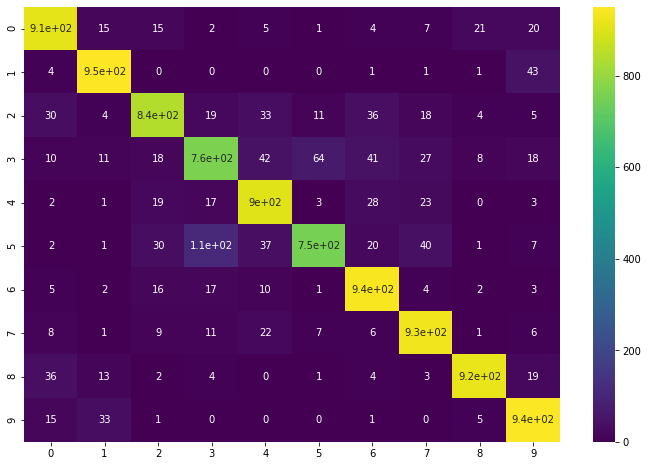

In [66]:
predictions=model2.predict_classes(x_test)
print(confusion_matrix(y_test,predictions))
plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cmap='viridis')

## prediction on a single test image

(32, 32, 3)


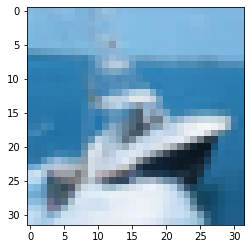

In [67]:
single_image=x_train[8]
print(single_image.shape)
plt.imshow(single_image)

In [68]:
model2.predict_classes(single_image.reshape(1,32,32,3))

array([8])

In [69]:
y_train[8]

array([8], dtype=uint8)

In [70]:
#looks like model is predicting quite well